In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
parking = pd.read_excel('parking (6).xls')

In [8]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [9]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [11]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [12]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [13]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

# 1. What is the distribution or values for owned/leased

<BarContainer object of 9060 artists>

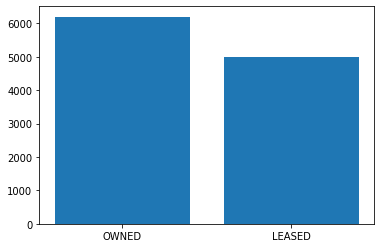

In [14]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces'])

In [26]:
owned_leased = pd.pivot_table(parking,index = 'Owned/Leased', values='Total Parking Spaces', aggfunc='count')

In [27]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


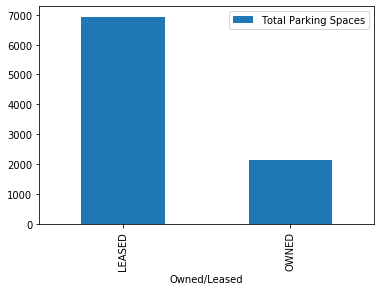

In [29]:
owned_leased.plot(kind='bar')

<BarContainer object of 2 artists>

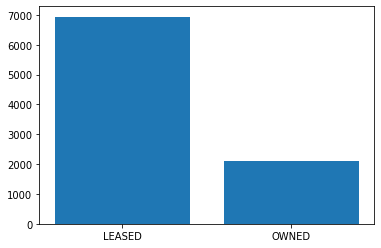

In [31]:
plt.bar(owned_leased.index, owned_leased['Total Parking Spaces'])

# 2 In which bldg state parking situation is in excess- Put it in an order

In [32]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [33]:
excess_parking = pd.pivot_table(parking, index = 'Bldg State', columns='Bldg Status',values='Total Parking Spaces')

In [34]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [35]:
excess_parking = excess_parking[excess_parking.EXCESS > 0]

In [36]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


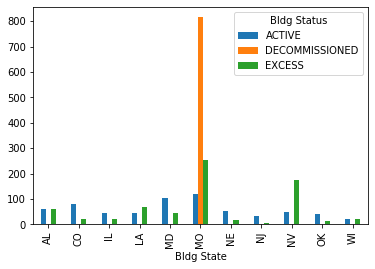

In [38]:
excess_parking.plot(kind='bar')

<BarContainer object of 11 artists>

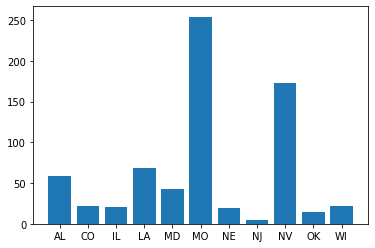

In [40]:
plt.bar(excess_parking.index,excess_parking.EXCESS)

In [45]:
excess_parking_sorted=excess_parking.EXCESS.sort_values(ascending = False)

In [46]:
excess_parking_sorted

Bldg State
MO    254.272727
NV    173.000000
LA     68.666667
AL     59.000000
MD     43.166667
CO     22.200000
WI     22.000000
IL     21.000000
NE     19.000000
OK     14.000000
NJ      4.300000
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

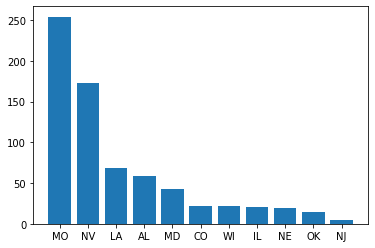

In [47]:
plt.bar(excess_parking_sorted.index, excess_parking_sorted.values)

# 3: Bldg Cities that have been decommisioned along with total parking

In [48]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [51]:
decom_parking_city = parking[parking['Bldg Status']=='DECOMMISSIONED']

In [52]:
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


# 4. In which type of property parcking space is in excess

In [53]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [54]:
excess_parking_property = pd.pivot_table(parking[parking['Bldg Status']=='EXCESS'],index='Property Type', values='Total Parking Spaces')

In [55]:
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


# 5. Where is more active parking - Owned/Leased

In [56]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [59]:
active_parking = pd.pivot_table(parking[parking['Bldg Status']=='ACTIVE'],index='Owned/Leased', values='Total Parking Spaces')

In [60]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [61]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [63]:
active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [64]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [65]:
active_parking['%Contribution']=active_parking['Total Parking Spaces']/active_parking['Total Parking Spaces'].sum()

In [66]:
active_parking

,Total Parking Spaces,%Contribution
Owned/Leased,,
LEASED,44.707349,0.375461
OWNED,74.365997,0.624539


# 6. States with more leased parking

In [67]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [70]:
state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased']=="LEASED"],index='Bldg State', values='Total Parking Spaces')

In [72]:
state_leased_parking.sort_values('Total Parking Spaces', ascending=False)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316
